In [0]:
# Portfolio optimization using Efficient Frontier

In [0]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
# Getting the stock symbols in the portfolio
# FAANG Facebook Amazon Apple Netflix Google
assets = ['FB', 'AMZN', 'AAPL', 'NFL', 'GOOG']

In [0]:
# Assign weights to our portfolio
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [0]:
#Get the portfolio start date
stock_start_date = '2013-01-01'

In [6]:
# Get the ending date
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-04-07'

In [7]:
# create the dataframa to store the adjusted close price of the stock
df = pd.DataFrame()

for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start=stock_start_date, end=today)['Adj Close']

df

,FB,AMZN,AAPL,NFL,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.687538,NaN,360.274597
2013-01-03,27.770000,258.480011,67.820526,NaN,360.483826
2013-01-04,28.760000,259.149994,65.931404,NaN,367.607117
2013-01-07,29.420000,268.459991,65.543602,NaN,366.003143
2013-01-08,29.059999,266.380005,65.719994,NaN,365.280823
...,...,...,...,...,...
2020-03-31,166.800003,1949.719971,254.289993,NaN,1162.810059
2020-04-01,159.600006,1907.699951,240.910004,NaN,1105.619995
2020-04-02,158.190002,1918.829956,244.929993,NaN,1120.839966


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()


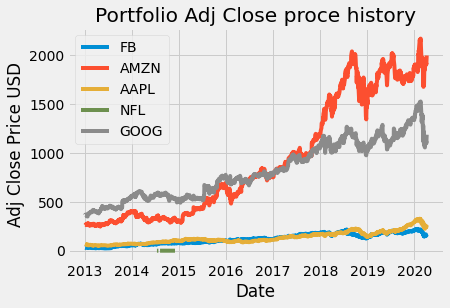

In [8]:
# Show the stock over time
title = 'Portfolio Adj Close proce history'

my_stocks = df

for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label=c)

plt.title(title)
plt.xlabel('Date')
plt.ylabel('Adj Close Price USD')
plt.legend(my_stocks.columns.values, loc='upperleft')
plt.show()

In [9]:
# Show the daily simple returns
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFL,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012623,NaN,0.000581
2013-01-04,0.035650,0.002592,-0.027855,NaN,0.019760
2013-01-07,0.022949,0.035925,-0.005882,NaN,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,NaN,-0.001974
...,...,...,...,...,...
2020-03-31,0.005122,-0.007246,-0.002041,0.0,0.013943
2020-04-01,-0.043165,-0.021552,-0.052617,0.0,-0.049183
2020-04-02,-0.008835,0.005834,0.016687,0.0,0.013766


In [10]:
# Create and show the annual covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFL,GOOG
FB,0.115155,0.051306,0.039754,0.0,0.047233
AMZN,0.051306,0.090611,0.034707,0.0,0.045922
AAPL,0.039754,0.034707,0.076219,0.0,0.036372
NFL,0.000000,0.000000,0.000000,0.0,0.000000
GOOG,0.047233,0.045922,0.036372,0.0,0.063655


In [11]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.03424909064348493

In [12]:
# Calculate the portfolio volatility (stddev)
portfolio_volatility = np.sqrt(port_variance)
portfolio_volatility

0.1850650983937407

In [13]:
# Calculate the annual portfolio return
portfolio_simple_annual_return = np.sum(returns.mean() * weights) * 252
portfolio_simple_annual_return

0.20984279195356745

In [14]:
# Show all these variables
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(portfolio_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolio_simple_annual_return, 2) * 100) + '%'

print('Expected annual return ' + percent_ret)
print('Expected annual volatoloty / risk ' + percent_vols)
print('Expected annual variance ' + percent_var)

Expected annual return 21.0%
Expected annual volatoloty / risk 19.0%
Expected annual variance 3.0%


In [15]:
pip install PyPortfolioOpt

In [0]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [18]:
# Portfolio optimization

#Calculate expected returns and the annualized covariance matrix
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize to maximize the sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

# Optimized portfolio performance, note it performs better than the hardcoded porfolio we did at the begining
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

{'FB': 0.22565, 'AMZN': 0.54342, 'AAPL': 0.23093, 'NFL': 0.0, 'GOOG': 0.0}
Expected annual return: 29.8%
Annual volatility: 24.9%
Sharpe Ratio: 1.11


(0.2978898464076871, 0.24924404086415347, 1.1149307539880025)

In [20]:
# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
discrete_allocation = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)
allocation, leftover = discrete_allocation.lp_portfolio()

# Number of shares of each stock we should buy 
print('Discrete allocation', allocation)

# Remaining money we will have
print('Funds remaining: ${:.2f}'.format(leftover))


Discrete allocation {'FB': 21.0, 'AMZN': 4.0, 'AAPL': 13.0}
Funds remaining: $120.98
